## scratch
1. copy of network dataframe
2. drawing network graph

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

gml_files = glob('../output/network/*/*.gml')

# graph = nx.read_gml('../data/graph/article1.gml')
# print(len(gml_files))
# gml_files
# gml_files[0]

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info
    
    ## plot spring layout
    # plt.figure(figsize=(11,11))
    # nx.draw_spring(graph, arrows=True, with_labels=True)

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

In [3]:
# create empty dataframe with columns

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    'avg degree',
                    'density',
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'highest degc',
                    'highest betc',
                    'highest cloc',
                    'avg in-deg',
                    'avg out-deg',
                    '# strong comp',
                    '# weak comp',
                    '# conn comp',
                    'avg node connect',
                    'deg assort coeff',
                    ]

network_data = pd.DataFrame(columns = network_data_columns)

In [4]:
# graph = directed, ugraph = undirected

for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    ugraph = graph.to_undirected() ## to undirected graph
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 40)
    print(gml_graph)
    calculate_graph_inf(graph)
    calculate_graph_inf(ugraph)

    # calculate variables
    
    sent = filepath.split('/')[-1]
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    in_deg = sum(graph.in_degree().values())/float(nx.number_of_nodes(graph))
    out_deg = sum(graph.out_degree().values())/float(nx.number_of_nodes(graph))
    avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    strong_comp = nx.number_strongly_connected_components(graph)
    weak_comp =  nx.number_weakly_connected_components(graph)
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_connected_components(ugraph)
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)

    # save variables into list

    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    'avg degree':avg_deg,
                    'density':density,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'highest degc':highest_deg_cen,
                    'highest betc':highest_bet_cen,
                    'highest cloc':highest_clo_cen,
                    'avg in-deg':"%.4f" % in_deg,
                    'avg out-deg':"%.4f" % out_deg,
                    '# strong comp':strong_comp,
                    '# weak comp':weak_comp,
                    '# conn comp':conn_comp,
                    'avg node connect':avg_node_con,
                    'deg assort coeff':deg_assort_coeff
                    }
    
    network_data = network_data.append(graph_values, ignore_index=True)
    
    if graph_num == 0:
        break

----------------------------------------
../output/network/positive/article2.gml
Name: article2.gml
Type: MultiDiGraph
Number of nodes: 28
Number of edges: 23
Average in degree:   0.8214
Average out degree:   0.8214
Name: article2.gml
Type: MultiGraph
Number of nodes: 28
Number of edges: 23
Average degree:   1.6429


In [5]:
network_data

,name,sentiment,# nodes,# edges,avg degree,density,avg deg cent,avg bet cent,avg clo cent,highest degc,highest betc,highest cloc,avg in-deg,avg out-deg,# strong comp,# weak comp,# conn comp,avg node connect,deg assort coeff
0,article2.gml,positive,28,23,1.6429,0.0304,0.0608,0.0006,0.0330,"(decrease in exemption rates, 0.222222222222)","(decrease in exemption rates, 0.00712250712251)","(decrease in exemption rates, 0.185185185185)",0.8214,0.8214,28,7,7,0.041,0.0631


- - -

# Drawing

In [ ]:
# read gml file
graph = nx.read_gml()
ugraph = graph.to_undirected()

In [ ]:
# plot spring layout
plt.figure(figsize=(11,11))
nx.draw_spring(graph, arrows=True, with_labels=True)

#plot circular layout
plt.figure(figsize=(12,12))
nx.draw_circular(graph, arrows=True, with_labels=True)

- - -

# Analysis

### Degree histogram
Return a list of the frequency of each degree value; degree values are the index in the list

In [6]:
# returns a list of frequencies of degrees
print ("undirected graph ="), nx.degree_histogram(ugraph)
print ("directed graph ="), nx.degree_histogram(graph)

undirected graph = [0, 19, 4, 3, 1, 0, 1]
directed graph = [0, 19, 4, 3, 1, 0, 1]


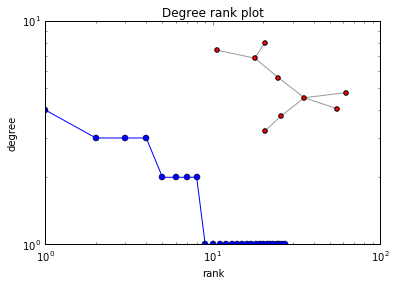

In [7]:
# degree rank plot
# only for undirected type

degree_sequence=sorted(nx.degree(ugraph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(ugraph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

### Density
Notes: The density is 0 for a graph without edges, and density = 1 for a complete graph. The density of multigraphs can be higher than 1 (self loops are counted in the total number of edges, so graphs with self loops can have density higher than 1).

In [8]:
print "undirected graph =", nx.density(ugraph)
print "directed graph =", nx.density(graph)

undirected graph = 0.0608465608466
directed graph = 0.0304232804233


In [13]:
# nx.diameter()

# nx.center()

### Degree centrality
Degree centrality for a node v is the fraction of nodes it is connected to

In [ ]:
# get all the values of the dictionary, this returns a list of centrality scores
# turn the list into a numpy array
# take the mean of the numpy array

print "Degree centrality (directed) =", np.array(nx.degree_centrality(graph).values()).mean()
print "Degree centrality (undirected) =", np.array(nx.degree_centrality(ugraph).values()).mean()

### Closeness centrality
Closeness centrality of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances n-1
Higher values of closeness indicate higher centrality

In [ ]:
# clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
# nx.closeness_centrality(graph)
# print "Closeness centrality (directed) =", np.array(nx.closeness_centrality(graph).values()).mean()
# print "Closeness centrality (undirected) =", np.array(nx.closeness_centrality(ugraph).values()).mean()

a = nx.closeness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['closeness centrality']
dfIn = dfIn.sort_values(by=['closeness centrality'])
dfIn

### Betweenness centrality
Betweenness centrality of a node v is the sum of the fraction of all pairs shortest paths that pass through v
Compute the shortest-path betweenness centrality for nodes

In [ ]:
# nx.betweenness_centrality(graph)
# bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()

# print "Betweenness centrality (directed) =", nx.betweenness_centrality(graph)
print "Betweenness centrality (directed) =", np.array(nx.betweenness_centrality(graph).values()).mean()
print "Betweenness centrality (undirected) =", np.array(nx.betweenness_centrality(ugraph).values()).mean()

a = nx.betweenness_centrality(graph)
dfIn=pd.DataFrame.from_dict(a,orient='index')
dfIn.columns = ['betweenness centrality']
dfIn = dfIn.sort_values(by=['betweenness centrality'])
dfIn

### Current-flow betweenness centrality
Current-flow betweenness centrality uses an electrical current model for information spreading in contrast to betweenness centrality which uses shortest paths. Current-flow betweenness centrality is also known as random-walk betweenness centrality

In [ ]:
# run for largest component
# graph must be connected
# print nx.current_flow_betweenness_centrality(graph)

### Degree assortativity coefficient

In [ ]:
#deg_ac = nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient (directed) =", nx.degree_assortativity_coefficient(graph)
print "Degree assortativity coefficient (undirected) =", nx.degree_assortativity_coefficient(ugraph)

### Clustering coefficient

In [ ]:
# (cannot be multigraph)
# nx.average_clustering(ugraph)

### Average node connectivity
The average connectivity \bar{\kappa} of a graph G is the average of local node connectivity over all pairs of nodes of G

In [ ]:
# nx.edge_connectivity(graph)
# nx.node_connectivity(graph)

# avg_node_con = nx.average_node_connectivity(graph)
print "Average node connectivity (directed) =", nx.average_node_connectivity(graph)
print "Average node connectivity (undirected) =", nx.average_node_connectivity(ugraph)

In [ ]:
# intersection_all()
# return a new graph that contains only the edges that exist in all graphs
# all supplied graphs must have the same node set